In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
zoo_data_set=pd.read_csv(r"C:\Users\pc\Desktop\Data Science Assignments\KNN\Zoo.csv")
del zoo_data_set['animal name']
zoo_data_set

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [4]:
# splitting the data
x=zoo_data_set.iloc[:,:-1]
y=zoo_data_set['type']

In [5]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


# finding the best value for k

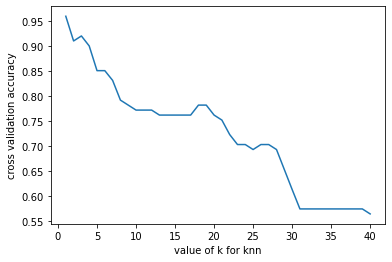

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,41)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors = k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())
# ploting
plt.plot(k_range,k_scores)
plt.xlabel("value of k for knn")
plt.ylabel("cross validation accuracy")
plt.show()

best value of k is 1 or 3

# model building

In [8]:
model=KNeighborsClassifier(n_neighbors = 1)
model.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [9]:
kfold=KFold(n_splits=5)

In [10]:
result=cross_val_score(model,x,y,cv=kfold)
result

array([1.  , 1.  , 1.  , 0.85, 0.9 ])

In [11]:
from sklearn import metrics
print("accuracy----->",metrics.accuracy_score(y,model.predict(x)))

accuracy-----> 1.0


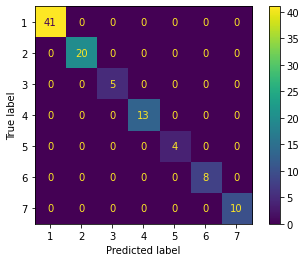

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x,y)

# Conclusion
Since the dataset is very small, training doesnt make much sense. The result values are too good. Its a overfitted model Unseen data can generate wrong values in this data since its very much overfitted.